In [1]:
from common import *
from train_dcgan import Generator as DCGenerator
from train_dcgan import Discriminator as DCDiscriminator
from train_wgan import Generator as WGenerator
from train_wgan import Discriminator as WDiscriminator
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
def get_models(which="dcgan", device="cpu"):
    
    if which == "dcgan":
        model_t = "dcgan-700"
        netG = DCGenerator().to(device)
        netD = DCDiscriminator().to(device)
    elif which == "wgan":
        model_t = "wgan-800"
        netG = WGenerator().to(device)
        netD = WDiscriminator().to(device)
        
    model_dir = f"final/{model_t}/models/"
    model_gen_path = os.path.join(model_dir, "gen.pth")
    model_disc_path = os.path.join(model_dir, "disc.pth")
    
    assert os.path.exists(model_dir)
    
    netG.load_state_dict(torch.load(model_gen_path))
    netD.load_state_dict(torch.load(model_disc_path))
    
    netG.eval()
    netD.eval()
    
    return netG, netD

# DCGAN

In [4]:
which = "dcgan"
netG1, netD1 = get_models(which, device)
netG1, netD1

(Generator(
   (main): Sequential(
     (0): ConvTranspose2d(128, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
     (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU(inplace=True)
     (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
     (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (5): ReLU(inplace=True)
     (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
     (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (8): ReLU(inplace=True)
     (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
     (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (11): ReLU(inplace=True)
     (12): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
 

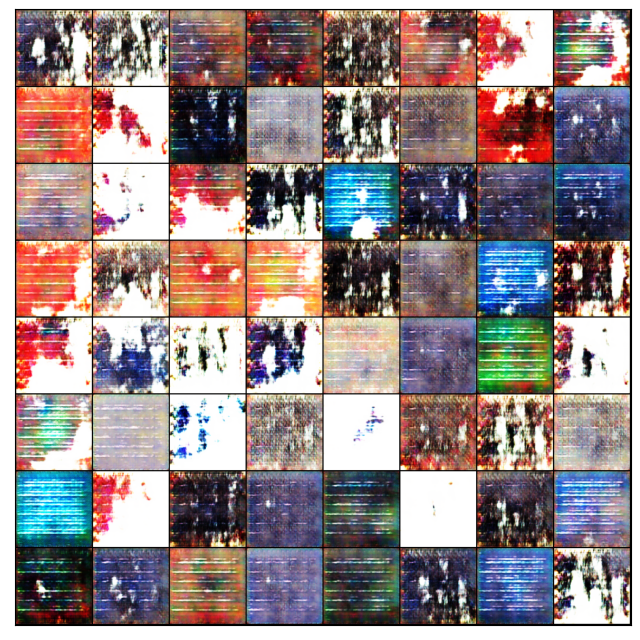

In [5]:
fixed_noise = torch.randn(64, CFG.n_z, 1, 1, device=device)
display_samples(netG1, 0, fixed_noise, save=False, show=True)

## Real ?

In [6]:
tmp = netD1(netG1(fixed_noise)).detach().cpu().reshape(8, 8)
tmp >= .5

tensor([[False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False]])

# WGAN

In [7]:
which = "wgan"
netG2, netD2 = get_models(which, device)
netG2, netD2

(Generator(
   (main): Sequential(
     (0): ConvTranspose2d(128, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
     (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU(inplace=True)
     (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
     (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (5): ReLU(inplace=True)
     (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
     (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (8): ReLU(inplace=True)
     (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
     (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (11): ReLU(inplace=True)
     (12): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
 

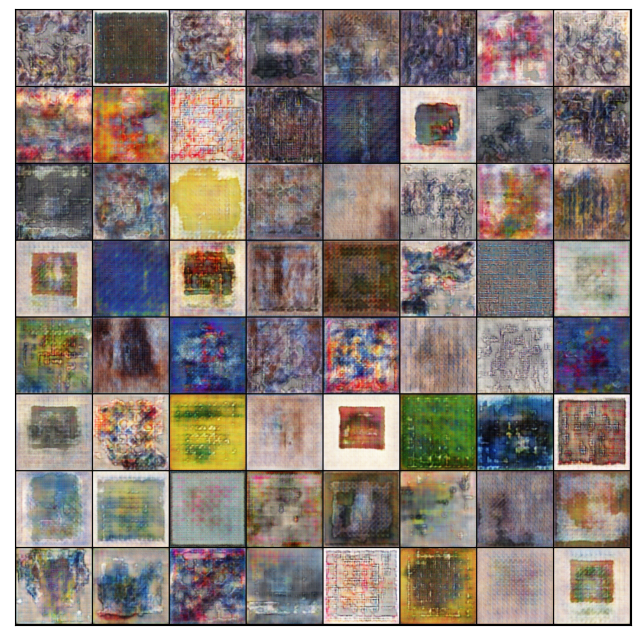

In [15]:
fixed_noise = torch.randn(64, CFG.n_z, 1, 1, device=device)
display_samples(netG2, 0, fixed_noise, save=False, show=True)